In [100]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [101]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("First 5 rows of train_df: \n", train_df.head(5))
print("First 5 rows of test_df: \n", test_df.head(5))

First 5 rows of train_df: 
    id  age          job  marital  education default  balance housing loan  \
0   0   42   technician  married  secondary      no        7      no   no   
1   1   38  blue-collar  married  secondary      no      514      no   no   
2   2   36  blue-collar  married  secondary      no      602     yes   no   
3   3   27      student   single  secondary      no       34     yes   no   
4   4   26   technician  married  secondary      no      889     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   25   aug       117         3     -1         0  unknown  0  
1   unknown   18   jun       185         1     -1         0  unknown  0  
2   unknown   14   may       111         2     -1         0  unknown  0  
3   unknown   28   may        10         2     -1         0  unknown  0  
4  cellular    3   feb       902         1     -1         0  unknown  1  
First 5 rows of test_df: 
        id  age            job  marital

In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [103]:
train_df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [104]:
train_df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [105]:
test_id_placeholder = test_df['id']

In [106]:
train_df = train_df.drop(columns='id')
test_df = test_df.drop(columns='id')

In [107]:
train_df['contact'].value_counts()

contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64

In [108]:
average_length_contact = train_df.groupby('contact')['duration'].mean()

average_length_contact

contact
cellular     265.710947
telephone    230.471057
unknown      239.834803
Name: duration, dtype: float64

How much predictive powert does the contact hold?

Cellular users tend to stay longer on calls than the telephone users.

Can I label the unknown with ML?

In [109]:
distribution_y = train_df['y'].value_counts().reset_index()

distribution_y

,y,count
0,0,659512
1,1,90488


In [110]:
distribution_y.columns

Index(['y', 'count'], dtype='object')

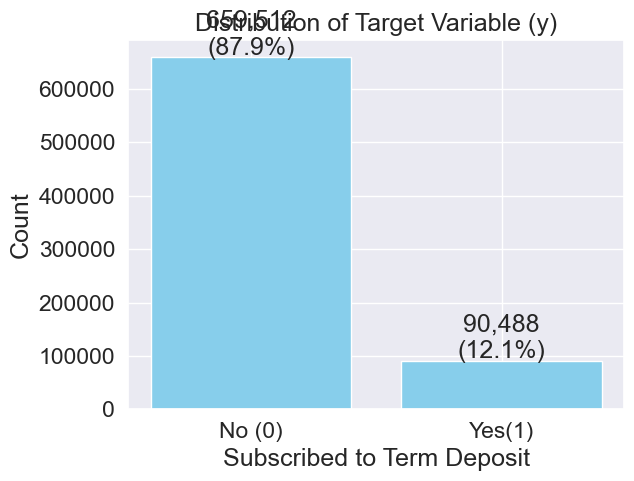

In [111]:
plt.bar(distribution_y['y'], distribution_y['count'], color=['skyblue', 'skyblue'])
plt.xticks([0, 1], ['No (0)', 'Yes(1)'])
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.title("Distribution of Target Variable (y)")

total = distribution_y['count'].sum()
for i, val in enumerate(distribution_y['count']):
    plt.text(i, val + 5000, f"{val:,}\n({val/total:.1%})", ha='center')

plt.show()

In [112]:
average_balance = train_df.groupby('y')['balance'].mean().reset_index()

average_balance

,y,balance
0,0,1075.364679
1,1,2142.103240


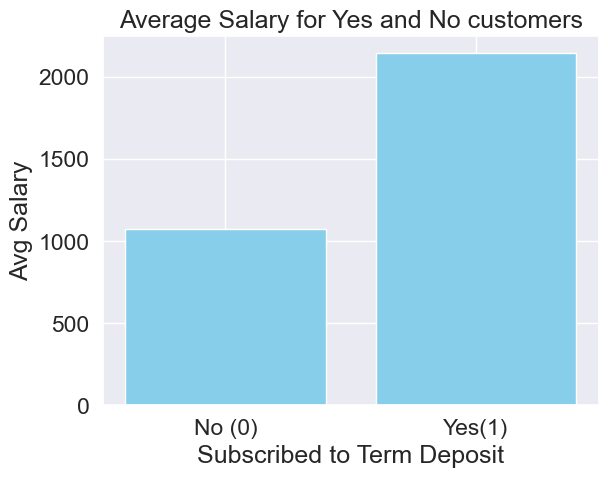

In [113]:
plt.bar(average_balance['y'], average_balance['balance'], color=['skyblue', 'skyblue'])
plt.xticks([0, 1], ['No (0)', 'Yes(1)'])
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Avg Salary")
plt.title("Average Salary for Yes and No customers")

plt.show()

<Axes: xlabel='y', ylabel='balance'>

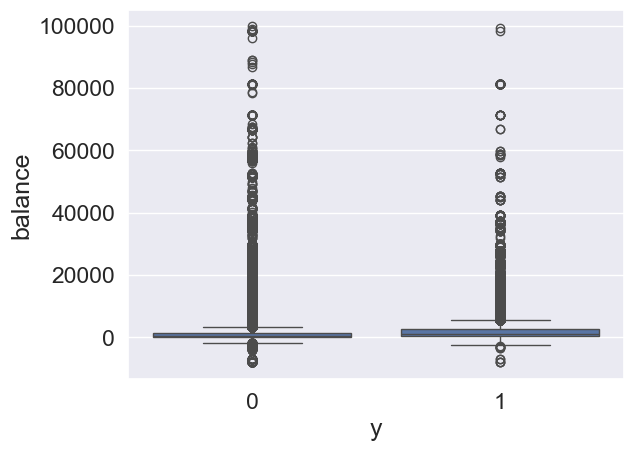

In [114]:
sns.boxplot( x=train_df["y"], y=train_df["balance"] )

the Balance feature could be a good predictor if the feature didn't present extreme outliers. Either outliers are dealt with or the model shouldn't rely heavily on this feature for prediction.

In [115]:
duration_average = train_df.groupby('y')['duration'].mean().reset_index()

duration_average

,y,duration
0,0,203.803576
1,1,638.327226


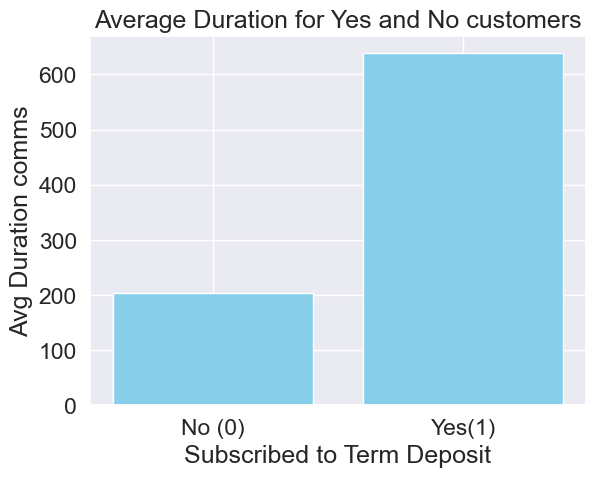

In [116]:
plt.bar(duration_average['y'], duration_average['duration'], color=['skyblue', 'skyblue'])
plt.xticks([0, 1], ['No (0)', 'Yes(1)'])
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Avg Duration comms")
plt.title("Average Duration for Yes and No customers")

plt.show()

<Axes: xlabel='y', ylabel='duration'>

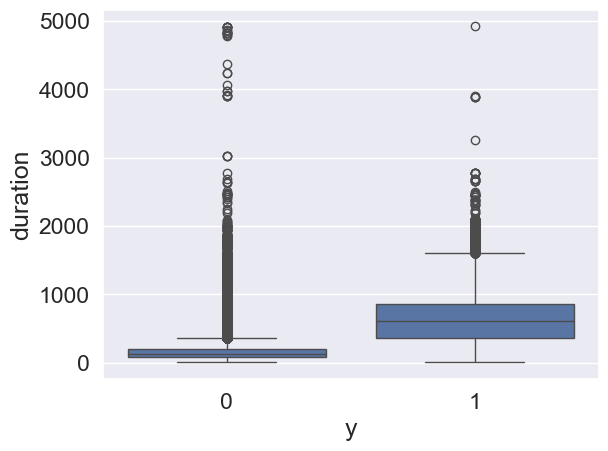

In [117]:
sns.boxplot( x=train_df["y"], y=train_df["duration"] )

In [118]:
positive_df = train_df.loc[train_df['y'] == 1]
positive_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
20,36,technician,single,tertiary,no,3415,no,no,cellular,24,jul,867,5,-1,0,unknown,1
42,59,admin.,married,secondary,no,2338,no,no,cellular,10,mar,472,1,90,3,success,1
57,46,admin.,married,secondary,no,1527,no,no,cellular,14,aug,391,1,-1,0,unknown,1
68,30,services,single,secondary,no,535,no,no,cellular,20,nov,944,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749922,33,student,single,unknown,no,358,no,no,cellular,8,jun,638,1,-1,0,unknown,1
749924,34,blue-collar,single,secondary,no,1979,no,no,unknown,16,jun,1205,3,-1,0,unknown,1
749973,33,management,married,tertiary,no,1831,no,no,cellular,12,aug,1452,5,-1,0,unknown,1
749976,44,technician,divorced,tertiary,no,2033,no,no,cellular,12,aug,309,1,104,2,success,1


In [119]:
negative_df = train_df.loc[train_df['y'] == 0]
negative_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749994,31,housemaid,single,secondary,no,594,no,no,cellular,4,feb,137,1,-1,0,unknown,0
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [120]:
positive_df['default'].value_counts()

default
no     89893
yes      595
Name: count, dtype: int64

In [121]:
negative_df['default'].value_counts()

default
no     647258
yes     12254
Name: count, dtype: int64

In [122]:
train_df['job'].value_counts(), train_df['marital'].value_counts(), train_df['education'].value_counts()

(job
 management       175541
 blue-collar      170498
 technician       138107
 admin.            81492
 services          64209
 retired           35185
 self-employed     19020
 entrepreneur      17718
 unemployed        17634
 housemaid         15912
 student           11767
 unknown            2917
 Name: count, dtype: int64,
 marital
 married     480759
 single      194834
 divorced     74407
 Name: count, dtype: int64,
 education
 secondary    401683
 tertiary     227508
 primary       99510
 unknown       21299
 Name: count, dtype: int64)

## Approach 1 EDA: target encoding

In [123]:
train_df['job'] = train_df['job'].replace('unknown', 'other')
train_df['education'] = train_df['education'].replace('unknown', 'other')

test_df['job'] = test_df['job'].replace('unknown', 'other')
test_df['education'] = test_df['education'].replace('unknown', 'other')

In [124]:
train_df['job'].value_counts(), train_df['marital'].value_counts(), train_df['education'].value_counts()

(job
 management       175541
 blue-collar      170498
 technician       138107
 admin.            81492
 services          64209
 retired           35185
 self-employed     19020
 entrepreneur      17718
 unemployed        17634
 housemaid         15912
 student           11767
 other              2917
 Name: count, dtype: int64,
 marital
 married     480759
 single      194834
 divorced     74407
 Name: count, dtype: int64,
 education
 secondary    401683
 tertiary     227508
 primary       99510
 other         21299
 Name: count, dtype: int64)

### Target encoding

Dealing with the job feature which contains many labels

In [125]:
from sklearn.model_selection import KFold

n_splits = 5 #dividing the train data into 5 folds

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

train_df['job_te'] = 0 #new feature to store target encoding

for train_idx, val_idx in kf.split(train_df):
    train_fold = train_df.iloc[train_idx]
    val_fold = train_df.iloc[val_idx]

    means = train_fold.groupby('job')['y'].mean()

    train_df.iloc[val_idx, train_df.columns.get_loc('job_te')] = val_fold['job'].map(means).values

train_df['job_te'] = train_df['job_te'].fillna(train_df['y'].mean())

In [126]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_te
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0,0.118663
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0,0.067291
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0,0.066972
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0,0.340478
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1,0.118533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1,0.083517
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0,0.246966
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0,0.067649
749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0,0.117919


In [127]:
#encoding test_df without the y

job_means = train_df.groupby('job')['y'].mean()
global_means = train_df['y'].mean()

test_df['job_te'] = test_df['job'].map(job_means)

test_df['job_te'] = test_df['job_te'].fillna(global_means)

test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,job_te
0,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown,0.067438
1,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown,0.150392
2,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown,0.129443
3,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown,0.067438
4,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown,0.118321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown,0.150392
249996,40,services,married,other,no,522,yes,no,cellular,19,nov,531,1,189,1,failure,0.082714
249997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success,0.246241
249998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown,0.067438


In [128]:
marital_encoded = pd.get_dummies(train_df['marital'], prefix= 'marital')

train_df = pd.concat([train_df, marital_encoded], axis = 1)

education_encoded = pd.get_dummies(train_df['education'], prefix= 'education')

train_df = pd.concat([train_df, education_encoded], axis=1)

train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,job_te,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary
0,42,technician,married,secondary,no,7,no,no,cellular,25,...,unknown,0,0.118663,False,True,False,False,False,True,False
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,...,unknown,0,0.067291,False,True,False,False,False,True,False
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,...,unknown,0,0.066972,False,True,False,False,False,True,False
3,27,student,single,secondary,no,34,yes,no,unknown,28,...,unknown,0,0.340478,False,False,True,False,False,True,False
4,26,technician,married,secondary,no,889,yes,no,cellular,3,...,unknown,1,0.118533,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,no,1282,no,yes,unknown,4,...,unknown,1,0.083517,False,False,True,False,False,True,False
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,...,unknown,0,0.246966,True,False,False,False,False,False,True
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,...,unknown,0,0.067649,False,True,False,False,False,True,False
749998,32,technician,married,secondary,no,-274,no,no,cellular,26,...,unknown,0,0.117919,False,True,False,False,False,True,False


In [129]:
restore_train_df = train_df.copy()

In [130]:
marital_encoded = pd.get_dummies(test_df['marital'], prefix= 'marital')

test_df = pd.concat([test_df, marital_encoded], axis = 1)

education_encoded = pd.get_dummies(test_df['education'], prefix= 'education')

test_df = pd.concat([test_df, education_encoded], axis=1)

test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,job_te,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary
0,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,...,0,unknown,0.067438,False,True,False,False,False,True,False
1,44,management,married,tertiary,no,23,yes,no,cellular,3,...,0,unknown,0.150392,False,True,False,False,False,False,True
2,36,self-employed,married,primary,no,46,yes,yes,cellular,13,...,0,unknown,0.129443,False,True,False,False,True,False,False
3,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,...,0,unknown,0.067438,False,True,False,False,False,True,False
4,28,technician,single,secondary,no,1950,yes,no,cellular,22,...,0,unknown,0.118321,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,management,married,tertiary,no,0,yes,no,cellular,18,...,0,unknown,0.150392,False,True,False,False,False,False,True
249996,40,services,married,other,no,522,yes,no,cellular,19,...,1,failure,0.082714,False,True,False,True,False,False,False
249997,63,retired,married,primary,no,33,no,no,cellular,3,...,8,success,0.246241,False,True,False,False,True,False,False
249998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,...,0,unknown,0.067438,False,True,False,False,True,False,False


In [131]:
restore_test_df = test_df.copy()

In [132]:
default_map = {
    'no' : 0,
    'yes' : 1
}

train_df['default'] = train_df['default'].map(default_map)

housing_map = {
    'no': 0,
    'yes': 1
}

train_df['housing'] = train_df['housing'].map(housing_map)

loan_map = {
    'no' : 0,
    'yes' : 1
}

train_df['loan'] = train_df['loan'].map(loan_map)


test_df['default'] = test_df['default'].map(default_map)

test_df['housing'] = test_df['housing'].map(housing_map)

test_df['loan'] = test_df['loan'].map(loan_map)

In [133]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,job_te,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary
0,42,technician,married,secondary,0,7,0,0,cellular,25,...,unknown,0,0.118663,False,True,False,False,False,True,False
1,38,blue-collar,married,secondary,0,514,0,0,unknown,18,...,unknown,0,0.067291,False,True,False,False,False,True,False
2,36,blue-collar,married,secondary,0,602,1,0,unknown,14,...,unknown,0,0.066972,False,True,False,False,False,True,False
3,27,student,single,secondary,0,34,1,0,unknown,28,...,unknown,0,0.340478,False,False,True,False,False,True,False
4,26,technician,married,secondary,0,889,1,0,cellular,3,...,unknown,1,0.118533,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,0,1282,0,1,unknown,4,...,unknown,1,0.083517,False,False,True,False,False,True,False
749996,69,retired,divorced,tertiary,0,631,0,0,cellular,19,...,unknown,0,0.246966,True,False,False,False,False,False,True
749997,50,blue-collar,married,secondary,0,217,1,0,cellular,17,...,unknown,0,0.067649,False,True,False,False,False,True,False
749998,32,technician,married,secondary,0,-274,0,0,cellular,26,...,unknown,0,0.117919,False,True,False,False,False,True,False


In [134]:
train_df['contact'] = train_df['contact'].replace('unknown', 'other')
train_df['poutcome'] = train_df['poutcome'].replace('unknown', 'other')

test_df['contact'] = test_df['contact'].replace('unknown', 'other')
test_df['poutcome'] = test_df['poutcome'].replace('unknown', 'other')

In [135]:
contact_encoded = pd.get_dummies(train_df['contact'], prefix='contact')

train_df = pd.concat([train_df, contact_encoded], axis = 1)

poutcome_encoded = pd.get_dummies(train_df['poutcome'], prefix='poutcome')

train_df = pd.concat([train_df, poutcome_encoded], axis= 1)

In [136]:
contact_encoded = pd.get_dummies(test_df['contact'], prefix='contact')

test_df = pd.concat([test_df, contact_encoded], axis = 1)

poutcome_encoded = pd.get_dummies(test_df['poutcome'], prefix='poutcome')

test_df = pd.concat([test_df, poutcome_encoded], axis= 1)

In [137]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_te', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [138]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

train_df['month_num'] = train_df['month'].map(month_map)

test_df['month_num'] = test_df['month'].map(month_map)

train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,month_num
0,42,technician,married,secondary,0,7,0,0,cellular,25,...,False,True,False,True,False,False,False,True,False,8
1,38,blue-collar,married,secondary,0,514,0,0,other,18,...,False,True,False,False,True,False,False,True,False,6
2,36,blue-collar,married,secondary,0,602,1,0,other,14,...,False,True,False,False,True,False,False,True,False,5
3,27,student,single,secondary,0,34,1,0,other,28,...,False,True,False,False,True,False,False,True,False,5
4,26,technician,married,secondary,0,889,1,0,cellular,3,...,False,True,False,True,False,False,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,0,1282,0,1,other,4,...,False,True,False,False,True,False,False,True,False,7
749996,69,retired,divorced,tertiary,0,631,0,0,cellular,19,...,False,False,True,True,False,False,False,True,False,8
749997,50,blue-collar,married,secondary,0,217,1,0,cellular,17,...,False,True,False,True,False,False,False,True,False,4
749998,32,technician,married,secondary,0,-274,0,0,cellular,26,...,False,True,False,True,False,False,False,True,False,8


In [139]:
train_df = train_df.drop(columns=['job', 'marital', 'contact', 'poutcome','education', 'month'])
test_df = test_df.drop(columns=['job', 'marital', 'contact', 'poutcome', 'education', 'month'])

In [140]:
y_placeholder_train = train_df.pop('y')

train_df['y'] = y_placeholder_train

train_df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,month_num,y
0,42,0,7,0,0,25,117,3,-1,0,...,True,False,True,False,False,False,True,False,8,0
1,38,0,514,0,0,18,185,1,-1,0,...,True,False,False,True,False,False,True,False,6,0
2,36,0,602,1,0,14,111,2,-1,0,...,True,False,False,True,False,False,True,False,5,0
3,27,0,34,1,0,28,10,2,-1,0,...,True,False,False,True,False,False,True,False,5,0
4,26,0,889,1,0,3,902,1,-1,0,...,True,False,True,False,False,False,True,False,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,0,1282,0,1,4,1006,2,-1,0,...,True,False,False,True,False,False,True,False,7,1
749996,69,0,631,0,0,19,87,1,-1,0,...,False,True,True,False,False,False,True,False,8,0
749997,50,0,217,1,0,17,113,1,-1,0,...,True,False,True,False,False,False,True,False,4,0
749998,32,0,-274,0,0,26,108,6,-1,0,...,True,False,True,False,False,False,True,False,8,0


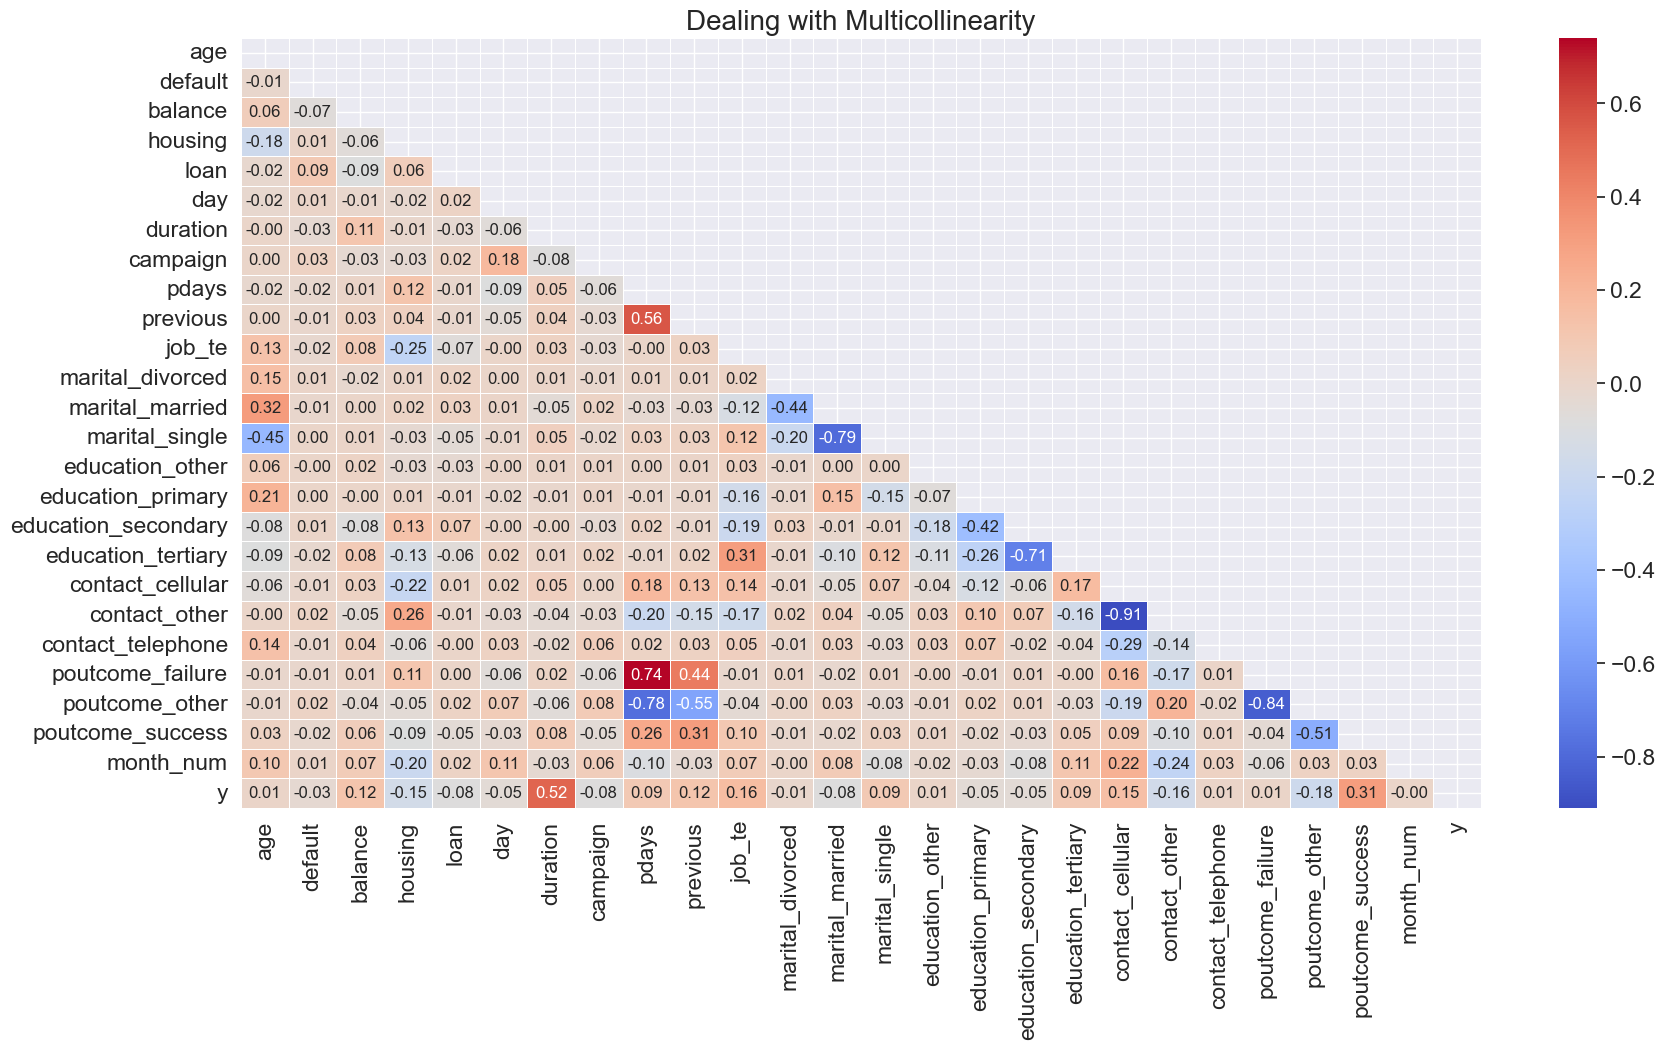

In [141]:
num_corr = round(train_df.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [143]:
#Function for LogisticRegression, RandomForestClassifier and XGBClassifier

def train_and_eval_models(X_train, X_test, y_train, y_test):

    #models to test
    models = {
        "Logistic Regression" : LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000), #remove attributes if single classification issue,
        "Random Forest" : RandomForestClassifier(),
        "XGB" : XGBClassifier()
    }

    print("Starting the training process.")

    #list to store results

    results = []

    #scaling data just for LogisticRegression

    for name, model in models.items():
        if name in ['Logistic Regression']:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            print(f"Features scaled for model {name}")

        print(f"Training model: {name}")

        model.fit(X_train_scaled, y_train)

        y_train_predict = model.predict(X_train_scaled) #to test accuracy on the train dataframe
        y_test_predict = model.predict(X_test_scaled)

        results.append({
            "Model" : name,
            "Train Accuracy" : accuracy_score(y_train, y_train_predict),
            "Test Accuracy" : accuracy_score(y_test, y_test_predict),
            "Train Precision" : precision_score(y_train, y_train_predict, average = 'weighted'), #remove ‘weighted’ if single classification
            "Test Precision" : precision_score(y_test, y_test_predict, average = 'weighted'),
            "Train F1 Score" : f1_score(y_train, y_train_predict, average = 'weighted'),
            "Test F1 Score" : f1_score(y_test, y_test_predict, average = 'weighted')
        })

    #Convering result into a df
    results_df = pd.DataFrame(results)
    print("\n Model Performance Summary: ")
    print(results_df)
    

    return results_df, model


In [144]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='y')
y = train_df['y']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size= 0.2, random_state=42)

In [145]:
baseline_df, baseline_model = train_and_eval_models(X_train, X_test, y_train, y_test)

Starting the training process.
Features scaled for model Logistic Regression
Training model: Logistic Regression
Training model: Random Forest
Training model: XGB

 Model Performance Summary: 
                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.912215       0.912607         0.903384   
1        Random Forest        0.999993       0.931867         0.999993   
2                  XGB        0.939513       0.933913         0.936846   

   Test Precision  Train F1 Score  Test F1 Score  
0        0.903934        0.904987       0.905392  
1        0.928379        0.999993       0.929497  
2        0.930949        0.937694       0.931977  


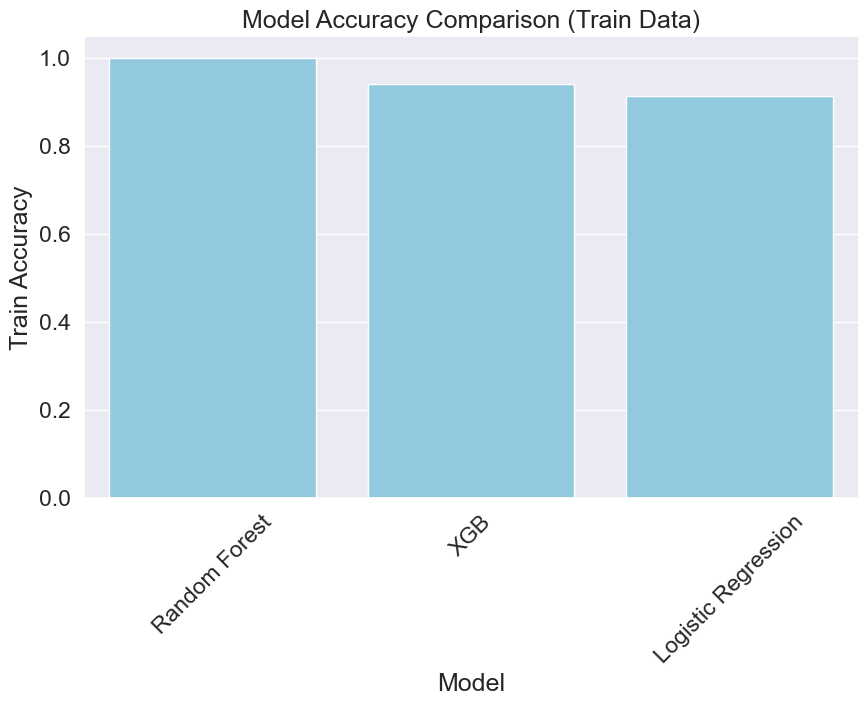

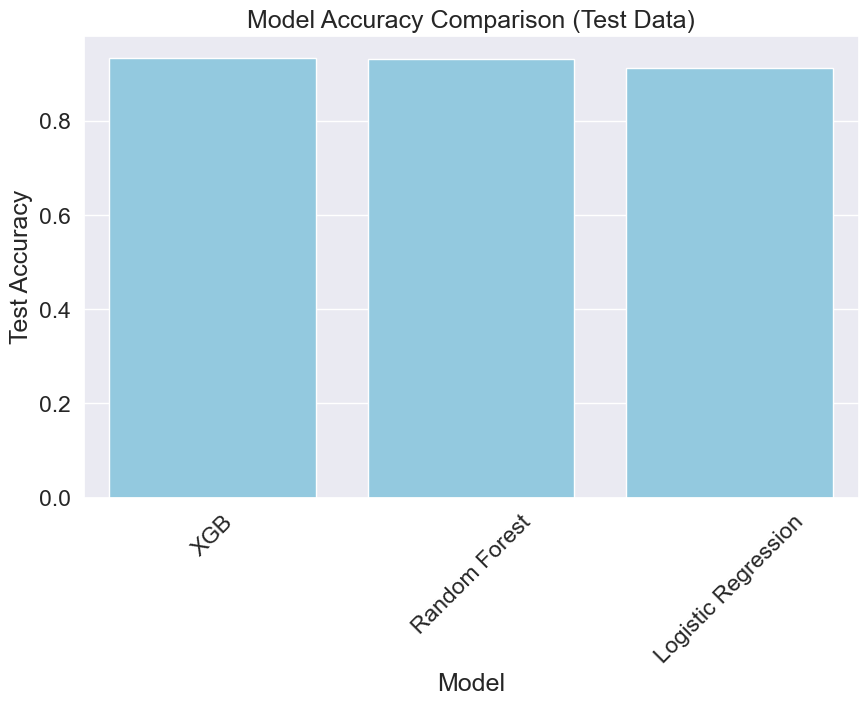

In [146]:
#plotting the results

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Train Accuracy", data=baseline_df.sort_values(by='Train Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Train Data)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test Accuracy", data=baseline_df.sort_values(by='Test Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Test Data)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# X_submission = test_df.copy()

# y_pred= baseline_model.predict(X_submission)

# submission_df = pd.DataFrame({
#     'id' : test_id_placeholder,
#     'Personality' : y_pred
# })

# submission_df.to_csv("submission1.csv", index= False)

# print("Success!")

Success!


## Permutation importance

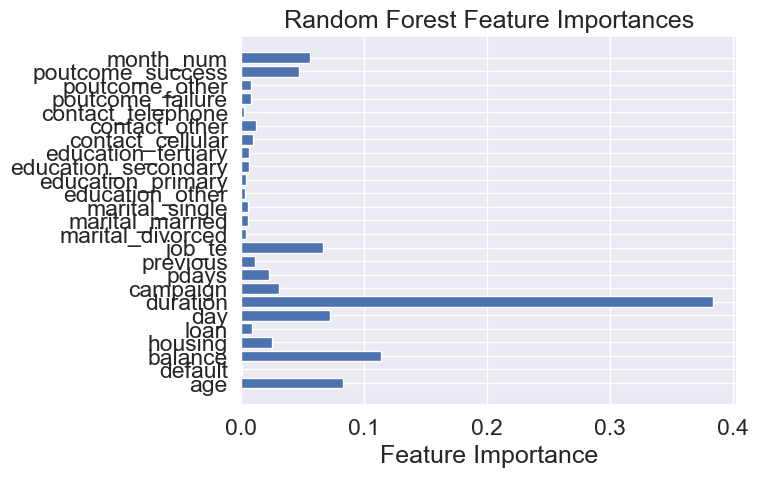

In [148]:
#FInd important features if correlation is weak

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

importance = clf.feature_importances_

# Plot importances
import matplotlib.pyplot as plt
feat_names = X_train.columns
plt.barh(feat_names, importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()
